# Table of Contents
 <p><div class="lev1 toc-item"><a href="#trying-coorbital-frame" data-toc-modified-id="trying-coorbital-frame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>trying coorbital frame</a></div><div class="lev2 toc-item"><a href="#look-at-2,2-and-2,-2" data-toc-modified-id="look-at-2,2-and-2,-2-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>look at 2,2 and 2,-2</a></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys
import os
import glob
import numpy as np
import h5py
import json

/Users/sebastian/work/git/stk/ml/waveforms/venv-wf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# sys.path.append("/Users/sebastian/work/git/stk/ml/waveforms/nonspin")

In [169]:
data_path = "/Users/sebastian/work/data/sxs-ecc/sxs-1356-lev6"
# data_path = "/Users/sebastian/work/data/sxs-416" # precessing case

In [170]:
# ls "/Users/sebastian/work/data/sxs-ecc/sxs-1356-lev6/"

In [171]:

with h5py.File(  os.path.join( data_path, "Horizons.h5" ), 'r') as f:
#     for k in f.keys():
#         print(k)
#         for l in f[k].keys():
#             print(l)
    
    
    AhA = f['AhA.dir/CoordCenterInertial.dat'][:]
    AhB = f['AhB.dir/CoordCenterInertial.dat'][:]
    AhC = f['AhC.dir/CoordCenterInertial.dat'][:]

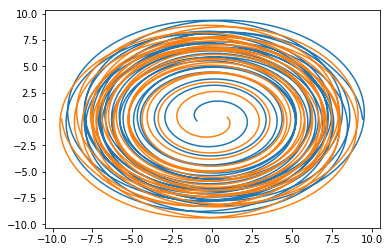

In [172]:
plt.figure()
plt.plot(AhA[:,1], AhA[:,2])
plt.plot(AhB[:,1], AhB[:,2])
# plt.plot(AhC[:,1], AhC[:,2])

In [173]:
hor_times = AhA[:,0]
sep_xy = np.array([AhA[:,1]-AhB[:,1], AhA[:,2] - AhB[:,2]])
sep = np.sqrt( sep_xy[0,:]**2. + sep_xy[1,:]**2. )

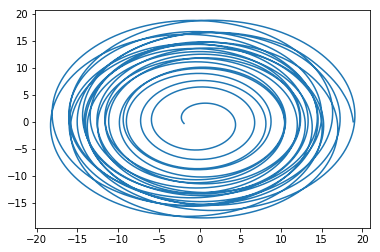

In [174]:
plt.figure()
plt.plot(sep_xy[0,:], sep_xy[1,:])

circular motion

```
x = r cos(phi)
y = r sin(phi)
```


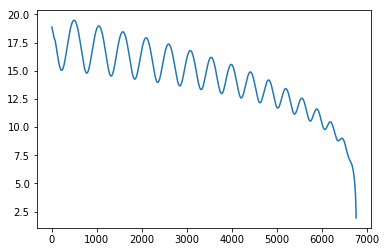

In [175]:
plt.figure()
plt.plot(hor_times, sep)

In [176]:
hor_times[1]-hor_times[0]

0.5

In [177]:
50/0.5

100.0

In [178]:
hor_times[100]

50.0

In [179]:
def moving_average(t, x, seglen, nseg):
    dt = t[1] - t[0]
    means = []
    times = []
    st = 0
    for i in range(len(x)/nseg):
        en = int(st + seglen/dt)
        try:
            times.append(t[st])
            means.append(np.mean(x[st:en]))
        except:
            break
        st = st + seglen
    return times, means

In [180]:
# the physical thing to do would be to compute the period of the oscillation
# and average over at least one period but serveral could be better.
mov_avg_sep_t, mov_avg_sep = moving_average(hor_times, sep, seglen=1000, nseg=10)

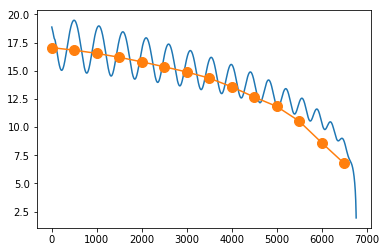

In [286]:
plt.figure()
plt.plot(hor_times, sep)
plt.plot(mov_avg_sep_t, mov_avg_sep, ls='-', marker='.', markersize=20)

In [182]:
with h5py.File(  os.path.join( data_path, "rhOverM_Asymptotic_GeometricUnits_CoM.h5" ), 'r') as f:
#     for k in list(f):
#         print(k)
#     for k in list(f["OutermostExtraction.dir"]):
#         print(k)
    h22 = f["OutermostExtraction.dir/Y_l2_m2.dat"][:]
    h2m2 = f["OutermostExtraction.dir/Y_l2_m-2.dat"][:]

times = h22[:,0]
for t1, t2 in zip(times, h2m2[:,0]):
    assert t1 == t2
    
h22 = h22[:,1] + 1.j * h22[:,2]
h2m2 = h2m2[:,1] + 1.j * h2m2[:,2]

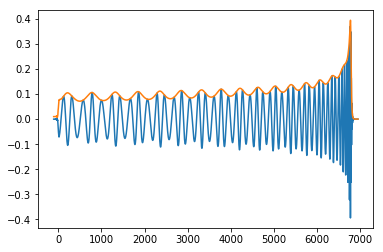

In [183]:
plt.figure()
plt.plot(times, h22.real)
plt.plot(times, np.abs(h22))

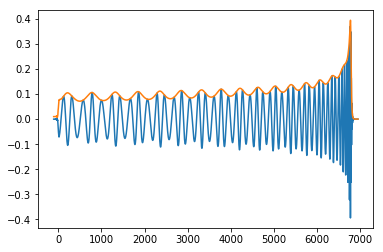

In [184]:
plt.figure()
plt.plot(times, h22.real)
plt.plot(times, np.abs(h22))
# plt.xlim(6000,7000)

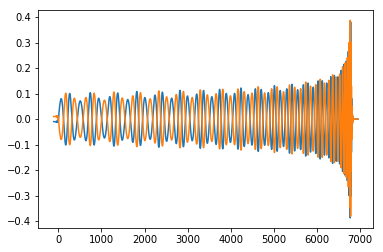

In [225]:
plt.figure()
plt.plot(times, h22.imag)
plt.plot(times, h2m2.imag)
# plt.xlim(6000,7000)

In [185]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [186]:
phase22 = np.unwrap(np.angle(h22))
freq22 = IUS(times, phase22).derivative()(times)

phase2m2 = np.unwrap(np.angle(h2m2))
freq2m2 = IUS(times, phase2m2).derivative()(times)

(0, 0.2)

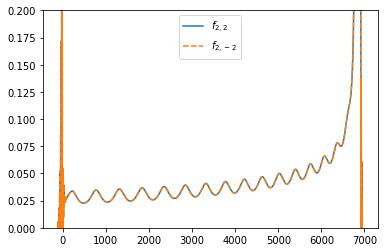

In [187]:
plt.figure()
plt.plot(times, -freq22, label=r'$f_{2,2}$')
plt.plot(times, freq2m2, label=r'$f_{2,-2}$', ls='--')
plt.legend()
plt.ylim(0,0.2)

(0, 0.05)

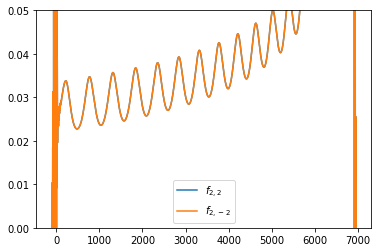

In [188]:
plt.figure()
plt.plot(times, -freq22, label=r'$f_{2,2}$')
plt.plot(times, freq2m2, label=r'$f_{2,-2}$')
plt.legend()
plt.ylim(0,0.05)
# plt.xlim(1000,2000)

i find that the amplitude of the 22 mode and the frequency
of the 22 mode are VERY similar to each other
when scaled... (during inspiral)

could be exploited in the modelling?

I guess this is the fact that the chirp mass appears in
both the amplitude and the phase? Or something else but
they are related

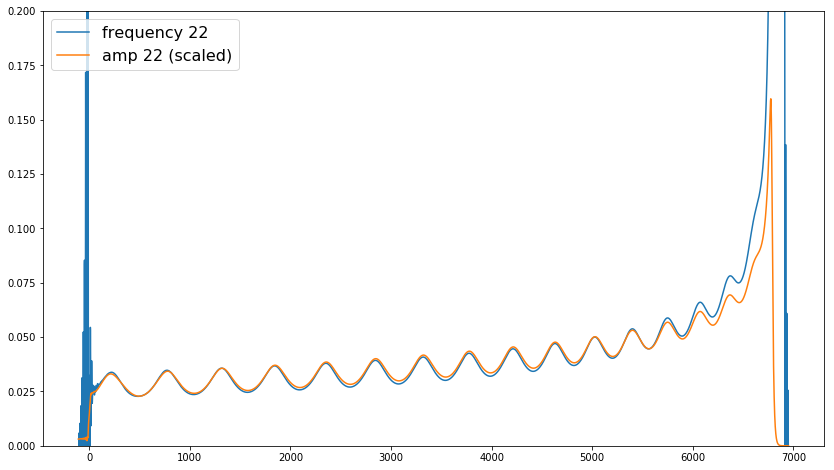

In [189]:
plt.figure(figsize=(14,8))
# plt.plot(times, phase22)
plt.plot(times, -freq22, label='frequency 22')
plt.ylim(0,0.2)
plt.plot(times, np.abs(h22)/3.2 * (1+ times*1e-4/2.3), label='amp 22 (scaled)')
plt.legend(fontsize=16, loc='upper left')

# trying coorbital frame

In [190]:
# see eq. 2 and 3 in https://arxiv.org/pdf/1905.09300.pdf

In [191]:
h22[0]

(-0.00016619820574912913-0.009912785176572679j)

In [192]:
h2m2[0]

(-0.00016630887846131413+0.009912706780324758j)

In [193]:
def get_phase(hlm):
    return np.unwrap(np.angle(hlm))

In [194]:
phase22 = get_phase(h22)
phase2m2 = get_phase(h2m2)

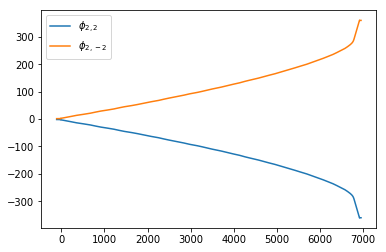

In [195]:
plt.figure()
plt.plot(times, phase22, label=r'$\phi_{2,2}$')
plt.plot(times, phase2m2, label=r'$\phi_{2,-2}$')
plt.legend()

In [196]:
# eq 3
# probably comes from phi_lm = m * phi_orb
orbital_phase = 0.25 * (phase2m2 - phase22)

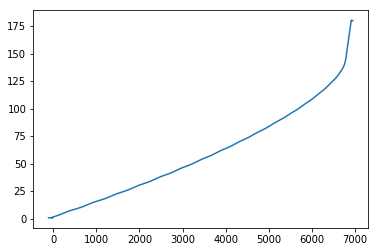

In [197]:
plt.figure()
plt.plot(times, orbital_phase)

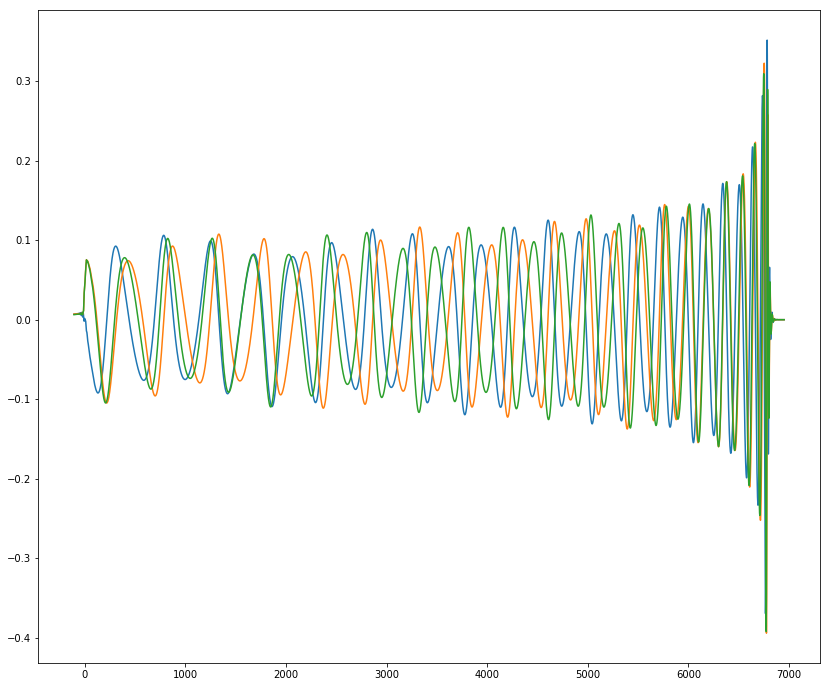

In [285]:
a = np.abs(h22)*np.cos(orbital_phase)
b = np.abs(h22)*np.sin(orbital_phase)
c = np.abs(h22)*np.sin(orbital_phase + (times)*1e-3)
plt.figure(figsize=(14, 12))
plt.plot(times, a)
plt.plot(times, b)
# plt.plot(times, np.sqrt(a**2 + b**2))

plt.plot(times, c)
# plt.plot(times, np.sqrt(a**2 + c**2))

In [210]:
h22_coorb = h22 * np.exp(1.j * 2 * orbital_phase)
h2m2_coorb = h2m2 * np.exp(-1.j * 2 * orbital_phase)

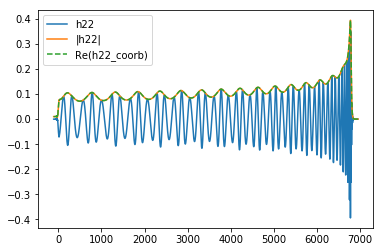

In [211]:
plt.figure()
plt.plot(times, np.real(h22), label='h22')
plt.plot(times, np.abs(h22), label='|h22|')
plt.plot(times, np.real(h22_coorb), label='Re(h22_coorb)', ls='--')
plt.legend()

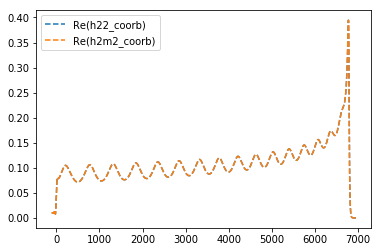

In [212]:
plt.figure()
plt.plot(times, np.real(h22_coorb), label='Re(h22_coorb)', ls='--')
plt.plot(times, np.real(h2m2_coorb), label='Re(h2m2_coorb)', ls='--')
plt.legend()

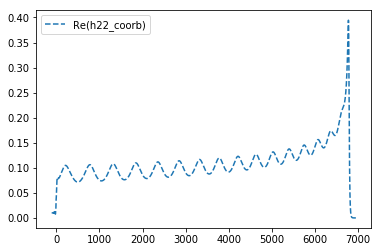

In [220]:
plt.figure()
plt.plot(times, np.real(h22_coorb), label='Re(h22_coorb)', ls='--')
plt.legend()

In [201]:
h22_coorb

array([9.91417832e-03+5.59861175e-08j, 9.92661081e-03+5.56824530e-08j,
       9.95377898e-03+3.65650902e-08j, ...,
       9.44381238e-06+4.12873709e-12j, 9.43801098e-06+3.75478866e-12j,
       9.43314406e-06+3.38344166e-12j])

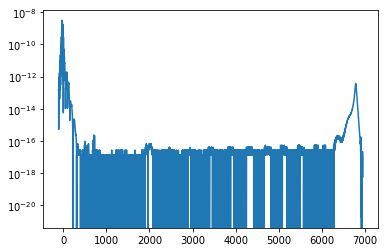

In [202]:
# here we see that the coorbital frame is just the amplitude
# of the h22 mode ?!?!?
plt.figure()
plt.plot(times, np.abs(np.abs(h22) - np.real(h22_coorb)))
plt.yscale('log')

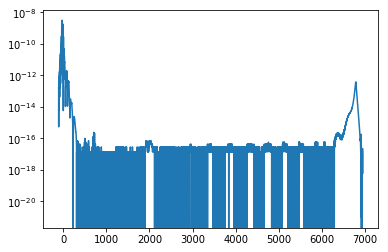

In [203]:
# here we see that the coorbital frame is just the amplitude
# of the h22 mode ?!?!?
plt.figure()
plt.plot(times, np.abs(np.abs(h2m2) - np.real(h2m2_coorb)))
plt.yscale('log')

In [204]:
# construct hlm \pm - eq 6
hlmplus = 0.5 * (h22_coorb + np.conj(h2m2_coorb))
hlmminus = 0.5 * (h22_coorb - np.conj(h2m2_coorb))

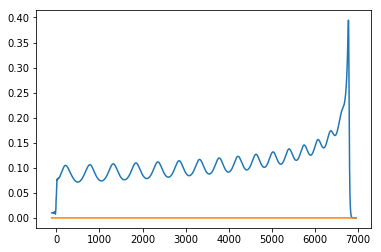

In [205]:
plt.figure()
plt.plot(times, np.abs(hlmplus))
plt.plot(times, np.abs(hlmminus))

## look at 2,2 and 2,-2

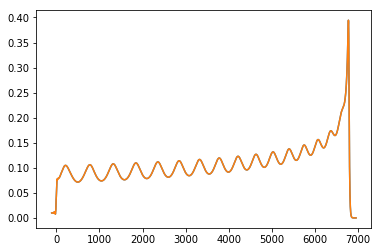

In [206]:
plt.figure()
plt.plot(times, np.abs(h22))
plt.plot(times, np.abs(h2m2))